<a href="https://colab.research.google.com/github/Dhiyun/2241720056_MOBILE_2024/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum Transformasi Linear Brightness**



> Akses folder images pada Google Drive Anda dengan kode berikut:



In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
import numpy as np
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).




> Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan menghasilkan warna.



 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


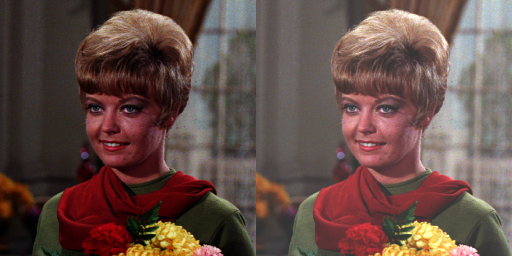

In [2]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **Tugas Praktikum**



1.   Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:



 Mengimplementasikan Inverse Citra 
-----------------------------------


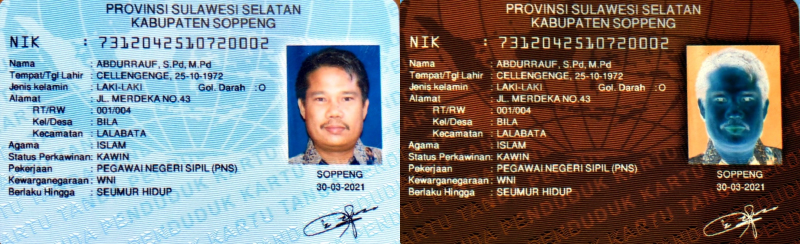

In [3]:
print(' Mengimplementasikan Inverse Citra ')
print('-----------------------------------')

original_inverse = cv.imread('/content/drive/MyDrive/PCVK/Image/KTP.jpg')
original_inverse = cv.resize(original_inverse, (0,0), fx=0.5, fy=0.5)

inverse = 255 - original_inverse

final_frame = cv.hconcat((original_inverse, inverse))
cv2_imshow(final_frame)



2.   Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:



 Mengubah Kontras dan Tingkat Kecerahan Citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


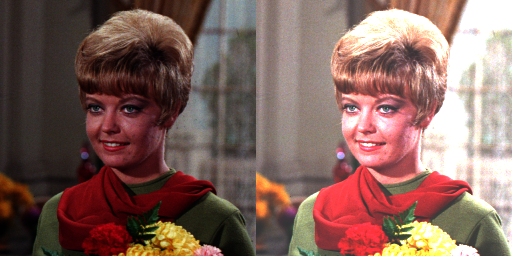

In [4]:
print(' Mengubah Kontras dan Tingkat Kecerahan Citra ')
print('----------------------------------------------')

while True:
  try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    if -255 <= brightness <= 255:
      contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
      if 1.0 <= contrast <= 3.0:
        break
      else:
        print('Persyaratan contrast tidak sesuai!')
    else:
      print('Persyaratan brightness tidak sesuai!')
  except ValueError:
    print('Error, not a number')

original_contrast = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
contrast_image = np.zeros(original_contrast.shape, original_contrast.dtype)

# #akses per piksel
for y in range(original_contrast.shape[0]):
  for x in range(original_contrast.shape[1]):
    for c in range(original_contrast.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original_contrast[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original_contrast, contrast_image))
cv2_imshow(final_frame)



3.   Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:



 Mengubah Tingkat Kecerahan dengan Transformasi Log 
----------------------------------------------------
Masukkan nilai kecerahan: 50


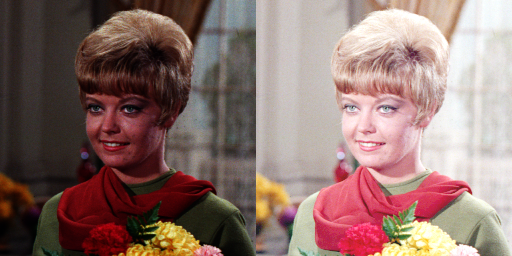

In [5]:
print(' Mengubah Tingkat Kecerahan dengan Transformasi Log ')
print('----------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original_log = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
log_image = np.zeros(original_log.shape, original_log.dtype)

#akses per piksel
for y in range(original_log.shape[0]):
  for x in range(original_log.shape[1]):
    for c in range(original_log.shape[2]):
      log_image[y,x,c] = np.clip(brightness * np.log(1 + original_log[y,x,c]), 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original_log, beta=brightness)

final_frame = cv.hconcat((original_log, log_image))
cv2_imshow(final_frame)



4.   Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:





> Averaging



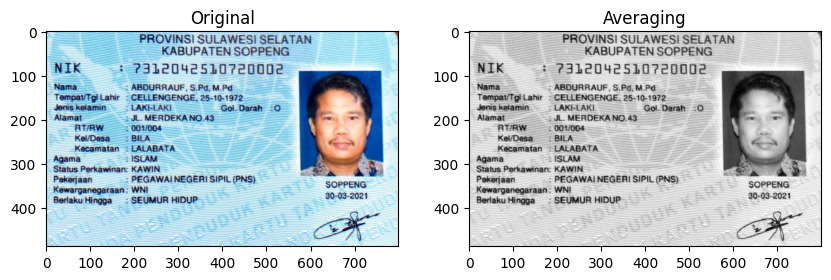

In [48]:
import matplotlib.pylab as plt

ktp = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Image/KTP.jpg'), cv.COLOR_BGR2RGB)
ktp_avg = ktp.copy()

gray = np.mean(ktp_avg, axis=2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(ktp)

plt.subplot(1, 2, 2)
plt.title('Averaging')
plt.imshow(gray, cmap='gray')

plt.show()



> Lightness



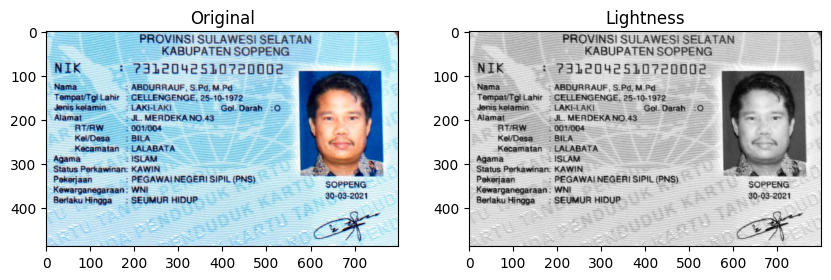

In [7]:
ktp_lght = ktp.copy()

max_rgb = np.max(ktp_lght, axis=2).astype(np.float32)
min_rgb = np.min(ktp_lght, axis=2).astype(np.float32)

lightness = ((max_rgb + min_rgb) / 2).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(ktp)

plt.subplot(1, 2, 2)
plt.title('Lightness')
plt.imshow(lightness, cmap='gray')

plt.show()



> Luminance



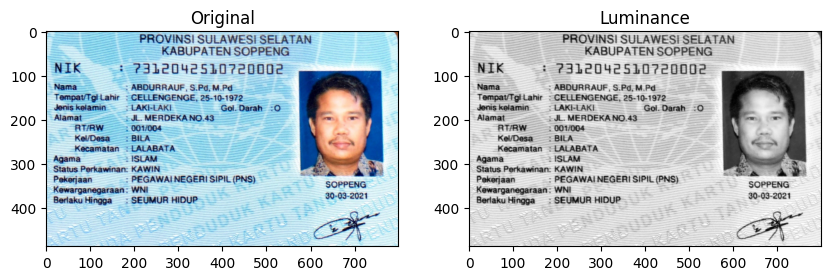

In [8]:
ktp_lmnc = ktp.copy()

R, G, B = np.split(ktp_lmnc, 3, axis=2)

luminance = ((0.21 * R) + (0.72 * G) + (0.07 * B)).astype(np.uint8)

luminance = np.squeeze(luminance, axis=2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(ktp)

plt.subplot(1, 2, 2)
plt.title('Luminance')
plt.imshow(luminance, cmap='gray')

plt.show()



5.   Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:



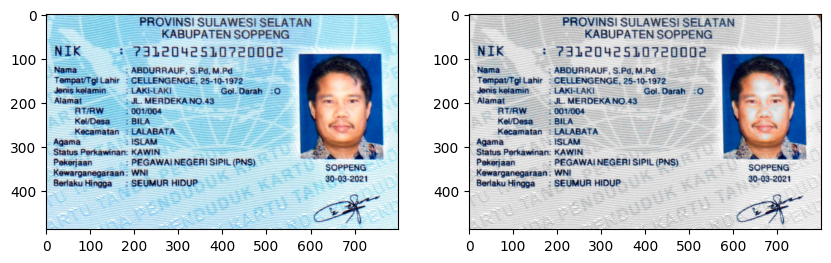

In [49]:
ktp_img = cv.imread('/content/drive/MyDrive/PCVK/Image/KTP.jpg')

B, G, R = ktp_img[:, :, 0], ktp_img[:, :, 1], ktp_img[:, :, 2]
blue_mask = (B > 100) & (R < 100) & (G < 100)
skin_mask = (R < 255) & (G < 205) & (B < 204)
combined_mask = blue_mask | skin_mask

gray_value = 0.21 * R + 0.72 * G + 0.07 * B
gray_image = np.stack([gray_value] * 3, axis=-1)
res = np.where(combined_mask[:, :, None], ktp_img, gray_image).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktp_img, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))

plt.show()